
# Unit 1: Project Final Submission

**Group 5:** AP Prabhakar, Carly Kimpling,
 Ophelia Winslett, Sabrina Downie, Umamah Uddin
***

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# Simulation parameters
dt = 0.1  # time step in ms
time = 100  # total time to simulate in ms
times = np.arange(0, time, dt)
# LIF neuron parameters
V_rest = -65  # resting membrane potential in mV
V_reset = -65  # reset voltage after spike in mV
V_threshold = -55  # spike threshold in mV
R_m = 12  # membrane resistance in Mohm
C_m = 1  # membrane capacitance in uF
tau_m = R_m * C_m  # membrane time constant in ms
I = 0.9  # constant input current in nA
V_sodium_jump = -60  # mV, the potential at which sodium channels 'activate'
sodium_jump = 20  # mV, the size of the jump to simulate sodium channel opening
refractory_period = 2  # refractory period in ms
# Initialize membrane potential array
V_m_LIF = np.zeros(len(times))
V_m_LIF[0] = V_rest
# Update loop for LIF model
for i in range(1, len(times)):
    dV = (-(V_m_LIF[i-1] - V_rest) + R_m * I) * dt / tau_m
    V_m_LIF[i] = V_m_LIF[i-1] + dV
    if V_m_LIF[i] >= V_threshold:
        V_m_LIF[i] = V_reset
# Initialize membrane potential array and a last spike time tracker
V_m_LIF_Sodium = np.zeros(len(times))
V_m_LIF_Sodium[0] = V_rest
last_spike_time = -np.inf  # Initialize to a value that ensures no initial refractory condition
for i in range(1, len(times)):
    if (times[i] - last_spike_time) > refractory_period:
        dV = (-(V_m_LIF_Sodium[i-1] - V_rest) + R_m * I) * dt / tau_m
        V_m_LIF_Sodium[i] = V_m_LIF_Sodium[i-1] + dV
        if V_m_LIF_Sodium[i] >= V_sodium_jump and V_m_LIF_Sodium[i] < V_threshold:
            V_m_LIF_Sodium[i] += sodium_jump
        if V_m_LIF_Sodium[i] >= V_threshold:
            V_m_LIF_Sodium[i] = V_reset
            last_spike_time = times[i]  # Update the last spike time
    else:
        # During refractory period, reset the potential without updating
        V_m_LIF_Sodium[i] = V_reset
# Initialize membrane potential array and a last spike time tracker
V_m_LIF_refractory = np.zeros(len(times))  # Using a new variable for clarity
V_m_LIF_refractory[0] = V_rest
last_spike_time_LIF = -np.inf  # Ensuring no initial refractory condition
# Update loop for LIF Na model with refractory periods
for i in range(1, len(times)):
    if (times[i] - last_spike_time_LIF) > refractory_period:
        dV = (-(V_m_LIF_refractory[i-1] - V_rest) + R_m * I) * dt / tau_m
        V_m_LIF_refractory[i] = V_m_LIF_refractory[i-1] + dV
        if V_m_LIF_refractory[i] >= V_threshold:
            V_m_LIF_refractory[i] = V_reset
            last_spike_time_LIF = times[i]  # Update the last spike time
    else:
        # During refractory period, reset the potential without updating
        V_m_LIF_refractory[i] = V_reset

**LIF (Leaky Integrate and Fire) Neuron:**

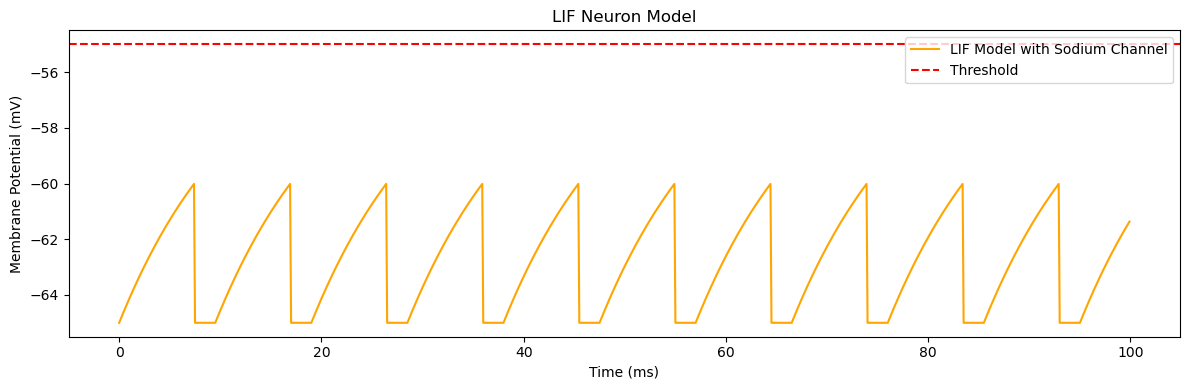

In [2]:
import matplotlib.pyplot as plt
# Plotting
plt.figure(figsize=(12, 4))
plt.plot(times, V_m_LIF_Sodium, label="LIF Model with Sodium Channel", color='orange')
plt.axhline(y=V_threshold, color='r', linestyle='--', label='Threshold')
plt.xlabel("Time (ms)")
plt.ylabel("Membrane Potential (mV)")
plt.title("LIF Neuron Model")
plt.legend()
plt.tight_layout()
plt.show()

A Leaky Integrate and Fire neuron model is a simple model of a biological neuron. It works by integrating current from multiple presynaptic neurons and firing an action potential when the threshold potential is reached. The model is very efficient but oversimplifies BNN and doesn’t take into account ion channels, adaptation or spike-timing-dependent plasticity. The LIF neuron models will have fewer bits of information compared to the other two models. This is because LIF models have less parameters and operations. Adding voltage-gated sodium channels increases its complexity but is still simpler than a simple neural network. 

 **LIF Model Updated with Voltage-Gated Sodium Channel Neuron:**

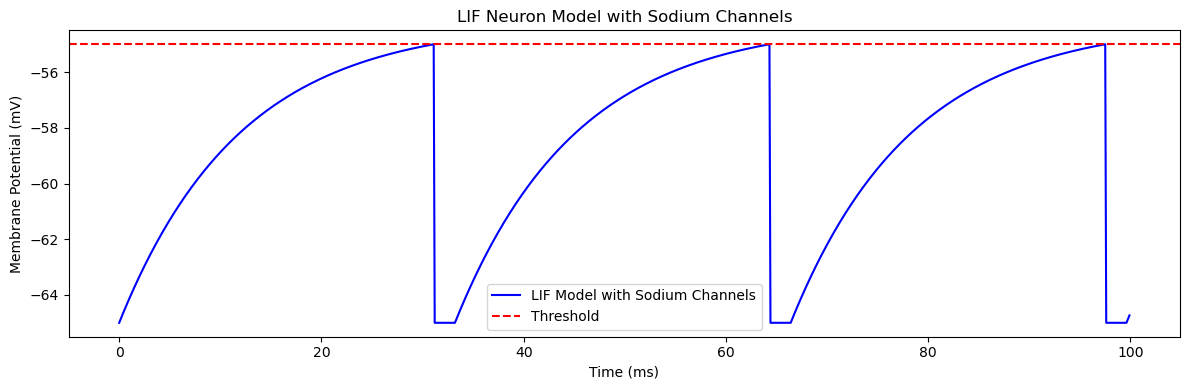

In [3]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))
# Plot for the original LIF model modified to include refractory periods
plt.plot(times, V_m_LIF_refractory, label="LIF Model with Sodium Channels", color='blue')
plt.axhline(y=V_threshold, color='r', linestyle='--', label='Threshold')
plt.xlabel("Time (ms)")
plt.ylabel("Membrane Potential (mV)")
plt.title("LIF Neuron Model with Sodium Channels")
plt.legend()
plt.tight_layout()
plt.show()

The second model is an LIF model with voltage-gated sodium channels. This allows the model to more accurately represent real action potential. Adding sodium conductances allows the model to take into consideration the fast depolarization phase of signal processing. Incorporating additional mechanisms increases computational complexity and would cause the model to have higher bits. Even with this added complexity, it still over simplifies BNNs because there is only one kind of channel.

**Simple Feedforward Neural Network:**


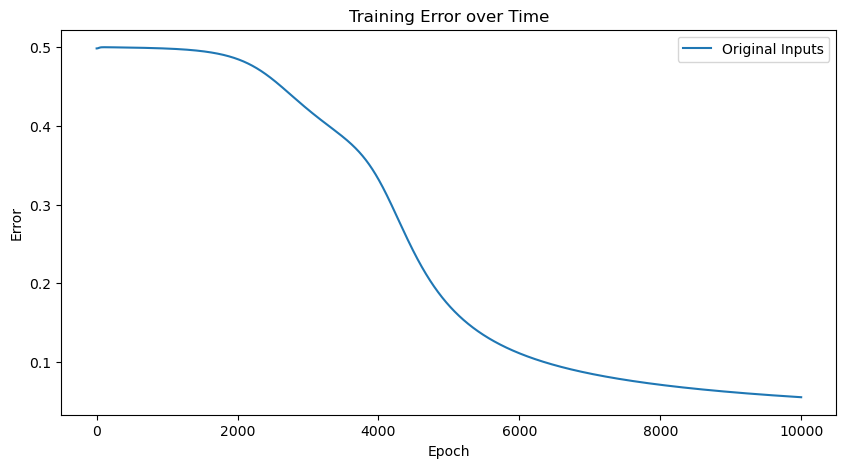

In [4]:
import numpy as np
import matplotlib.pyplot as plt
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def sigmoid_derivative(x):
    return x * (1 - x)
# Training function for neural network
def train_neural_network(inputs, expected_output, epochs=10000, lr=0.1):
    np.random.seed(0)  # For reproducibility
    inputLayerNeurons, hiddenLayerNeurons, outputLayerNeurons = 2, 2, 1
    hidden_weights = np.random.uniform(size=(inputLayerNeurons, hiddenLayerNeurons))
    hidden_bias = np.random.uniform(size=(1, hiddenLayerNeurons))
    output_weights = np.random.uniform(size=(hiddenLayerNeurons, outputLayerNeurons))
    output_bias = np.random.uniform(size=(1, outputLayerNeurons))
    errors = []
    for _ in range(epochs):
        # Forward propagation
        hidden_layer_activation = np.dot(inputs, hidden_weights)
        hidden_layer_activation += hidden_bias
        hidden_layer_output = sigmoid(hidden_layer_activation)
        output_layer_activation = np.dot(hidden_layer_output, output_weights)
        output_layer_activation += output_bias
        predicted_output = sigmoid(output_layer_activation)
        # Backpropagation
        error = expected_output - predicted_output
        errors.append(np.mean(np.abs(error)))  # Record the mean absolute error     
        d_predicted_output = error * sigmoid_derivative(predicted_output)
        error_hidden_layer = d_predicted_output.dot(output_weights.T)
        d_hidden_layer = error_hidden_layer * sigmoid_derivative(hidden_layer_output)
        # Updating Weights and Biases
        output_weights += hidden_layer_output.T.dot(d_predicted_output) * lr
        output_bias += np.sum(d_predicted_output, axis=0, keepdims=True) * lr
        hidden_weights += inputs.T.dot(d_hidden_layer) * lr
        hidden_bias += np.sum(d_hidden_layer, axis=0, keepdims=True) * lr
    return errors
# Original inputs and expected outputs for XOR
inputs = np.array([[0, 0],
                   [0, 1],
                   [1, 0],
                   [1, 1]])
expected_output = np.array([[0],
                            [1],
                            [1],
                            [0]])
errors_original = train_neural_network(inputs, expected_output)
# Plotting the errors over time
plt.figure(figsize=(10, 5))
plt.plot(errors_original, label='Original Inputs')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.title('Training Error over Time')
plt.legend()
plt.show()

This code defines a simple 2-2-1 feedforward neural network trained using backpropagation to learn the XOR function. The network uses a sigmoid activation function for both the hidden and output layers. The learning process involves forward propagating the inputs, calculating the error, and then backpropagating the error through the network to adjust the weights and biases. After training, the predicted_output should approximate the XOR function's expected output. <br><br>
A feedforward neural network has interconnected layers of neurons. Information goes from input to output without any feedback loops, making it an open loop. Each neuron’s inputs are multiplied by weights and then summed together to influence the output. The advantage of a feedforward neural network is that it can help with pattern recognition and classification. Some disadvantages is there is no feedback or correction loop and there is a possibility that the model will be overfit, especially with limited data. 

**Model Evaluation:**


The feedforward neural network is the most complex among the three models due to its weights and nonlinear activations. The LIF model with voltage-gated sodium channels is the second most complex due to the extra factor of sodium channels. The simplest model is the LIF model. <br><br>
The simplest LIF neuron model is the most concise because it has the smallest amount of operations. The LIF model with voltage-gated sodium channels adds complexity but remains concise compared to the feedforward neural network, which requires specifying the architecture, activation functions, and training algorithm.<br><br>
The feedforward neural network has the most bits of information due to its trainable parameters and nonlinear activations. The LIF models are simpler and therefore contain fewer bits of information, however, the LIF model with sodium channels will have more bits than the basic LIF model.


**Differing Inputs for the Simple Feedforward Neural Network:**

We have chosen to analyze how different input types affect our simple neural network. We have introduced the following two scenarios: inputs that are insufficient at reaching threshold and inputs coming in bursts. For these scenarios, we modified the original inputs to the network to observe how the changes affect the training process, particularly looking at the error rate over time. We will plot the error rate of the original training and both modified input scenarios on the same graph for direct comparison. For the first scenario, the inputs were multiplied by a number less than one to simulate insufficient inputs, and for the second scenario the inputs were multiplied by a number greater than 1 randomly to simulate bursting inputs. 

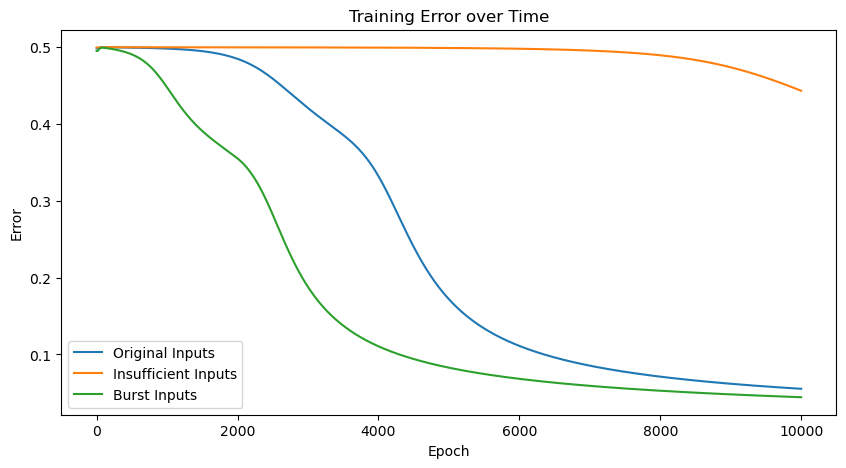

In [5]:
import numpy as np
import matplotlib.pyplot as plt
# Sigmoid activation function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def sigmoid_derivative(x):
    return x * (1 - x)
# Training function for neural network
def train_neural_network(inputs, expected_output, epochs=10000, lr=0.1):
    np.random.seed(0)  # For reproducibility
    inputLayerNeurons, hiddenLayerNeurons, outputLayerNeurons = 2, 2, 1
    hidden_weights = np.random.uniform(size=(inputLayerNeurons, hiddenLayerNeurons))
    hidden_bias = np.random.uniform(size=(1, hiddenLayerNeurons))
    output_weights = np.random.uniform(size=(hiddenLayerNeurons, outputLayerNeurons))
    output_bias = np.random.uniform(size=(1, outputLayerNeurons))
    errors = []
    for _ in range(epochs):
        # Forward propagation
        hidden_layer_activation = np.dot(inputs, hidden_weights)
        hidden_layer_activation += hidden_bias
        hidden_layer_output = sigmoid(hidden_layer_activation)
        output_layer_activation = np.dot(hidden_layer_output, output_weights)
        output_layer_activation += output_bias
        predicted_output = sigmoid(output_layer_activation)
        # Backpropagation
        error = expected_output - predicted_output
        errors.append(np.mean(np.abs(error)))  # Record the mean absolute error     
        d_predicted_output = error * sigmoid_derivative(predicted_output)
        error_hidden_layer = d_predicted_output.dot(output_weights.T)
        d_hidden_layer = error_hidden_layer * sigmoid_derivative(hidden_layer_output)
        # Updating Weights and Biases
        output_weights += hidden_layer_output.T.dot(d_predicted_output) * lr
        output_bias += np.sum(d_predicted_output, axis=0, keepdims=True) * lr
        hidden_weights += inputs.T.dot(d_hidden_layer) * lr
        hidden_bias += np.sum(d_hidden_layer, axis=0, keepdims=True) * lr
    return errors
# Original inputs and expected outputs for XOR
inputs = np.array([[0, 0],
                   [0, 1],
                   [1, 0],
                   [1, 1]])
expected_output = np.array([[0],
                            [1],
                            [1],
                            [0]])
# Scenario 1: Insufficient Inputs
insufficient_inputs = inputs * 0.5  # Reduce input magnitude
# Scenario 2: Burst Inputs
np.random.seed(0)  # For reproducibility
burst_inputs = inputs.copy()
for i in range(len(burst_inputs)):
    if np.random.rand() > 0.5:
        burst_inputs[i] *= 2  # Double input magnitude at random
# Train the network for each scenario
errors_original = train_neural_network(inputs, expected_output)
errors_insufficient = train_neural_network(insufficient_inputs, expected_output)
errors_burst = train_neural_network(burst_inputs, expected_output)
# Plotting the errors over time
plt.figure(figsize=(10, 5))
plt.plot(errors_original, label='Original Inputs')
plt.plot(errors_insufficient, label='Insufficient Inputs')
plt.plot(errors_burst, label='Burst Inputs')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.title('Training Error over Time')
plt.legend()
plt.show()

On the graph above, the line representing the original inputs corresponds to the error rate for the network trained with the original inputs. It is our baseline for comparison. For insufficient inputs, the input magnitude is reduced by half. This shows the effect of insufficient inputs to activate the neurons to expected levels. As seen in the graph, the error rate for insufficient inputs is higher and decreases slowly compared to the original inputs. For bursting inputs, the inputs were introduced at double their magnitude randomly which simulates bursts of higher-than-normal inputs. The error rate for the burst inputs scenario fluctuates more compared to the original inputs but eventually converges. The network can handle bursts to some extent. The differences in the error rates and their convergence over time shows how modifying the input conditions impacts the learning process of neural networks. Insufficient inputs slow down learning due to less activation received by the network. On the other hand, burst inputs provide variability but doesn't necessarily prevent learning. This shows that there is some level of agility in the network's ability to adapt to varying input magnitudes.

**Inhibitory Inputs in the Simple Feedforward Neural Network:**

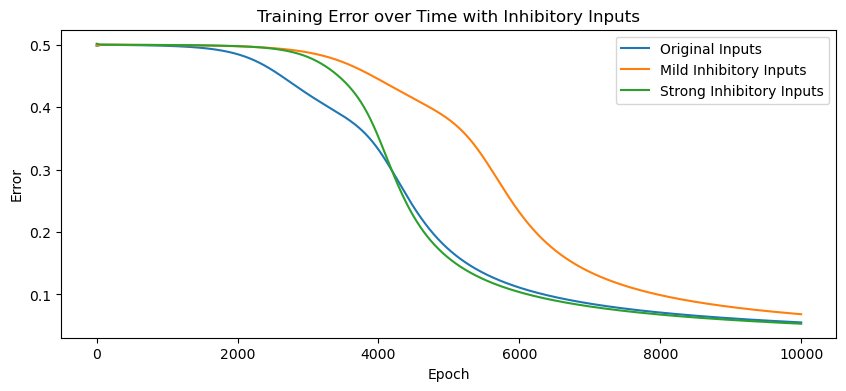

In [6]:
import numpy as np
import matplotlib.pyplot as plt
# Scenario 1: Mild Inhibitory Inputs
# We reduce the input values by a small factor to simulate mild inhibition
mild_inhibitory_inputs = inputs * 0.8
# Scenario 2: Strong Inhibitory Inputs
# We introduce stronger inhibition by inverting the sign of half the inputs
strong_inhibitory_inputs = inputs.copy()
strong_inhibitory_inputs[:, 0] = strong_inhibitory_inputs[:, 0] * -1  # Invert the sign of the first column
# Train the network for each inhibitory scenario
errors_mild_inhibitory = train_neural_network(mild_inhibitory_inputs, expected_output)
errors_strong_inhibitory = train_neural_network(strong_inhibitory_inputs, expected_output)
# Plotting the errors over time with inhibitory inputs
plt.figure(figsize=(10, 4))
plt.plot(errors_original, label='Original Inputs')
plt.plot(errors_mild_inhibitory, label='Mild Inhibitory Inputs')
plt.plot(errors_strong_inhibitory, label='Strong Inhibitory Inputs')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.title('Training Error over Time with Inhibitory Inputs')
plt.legend()
plt.show()

We have chosen to analyze the effects of the addition of inhibitory inputs into our simple neural network. The same process as described in question 4 was used. From the graph above, you can see two types of inhibitory inputs – mild inhibition in orange and strong inhibition in green – compared to the original inputs that were run through the neural network. As you can see from the graph, when compared to the original inputs, the change of some inputs to strong inhibition results in a small delay of the learning rate of the neural network model, or the amount of error over time. This makes sense as the neural network would have to adjust for these inhibitory inputs; however, since these inhibitory inputs are strong, it is able to quickly learn how to deal with them, allowing the learning rate to become the same as the original inputs. This would be analogous to biology as strong inhibitory inputs completely shut off pathways, and the surrounding neurons adjust quickly. The mild inhibitory inputs create a much different learning rate however. As the graph shows, introduction of mild inhibitory inputs causes the error rate to take a significant time to reach anywhere close to that of the original inputs. Mild inhibition would result in dampening of signals more so than complete elimination of them. As a result of this, it would take the neural network much longer to adjust as the signals are just dampened and not strongly inhibitory. This is also analogous to a biological neuron. In a biological neuron, weakly inhibitory signals take time to completely result in inhibition of a given neuron. This means that the learning of this neuron takes longer. Overall, strong inhibitory inputs cause a slight delay in learning while mild inhibitory inputs create a much greater delay in learning.

**Artificial Intelligence:**

Artificial Intelligence (AI) has emerged as a powerful platform that can do virtually any task a human would perform (sparing creativity, emotional intelligence, and judgment, however), coupled with its keen ability to analyze and interpret data, process language, and predict outcomes very quickly. It does so by using machines (computer systems) with complex algorithms and statistical models. The novel idea of a computer program being able to mimic the skills of a human in completing tasks was introduced in the 1950s, but did not become a successful and focal point of research until the 1990s and 2000s. There was progress made in the 1970s (Newell and Simon–General Problem Solver program and Joseph Weizenbaum–ELIZA program) and the early 1980s (John Hopfield and David Rumelhart–deep learning, Edward Feigenbaum–decision making expert systems), however government funding and patience for successful, tangible outcomes ceased. In 2012, the breakthrough of artificial neural networks emerged, and since then, AI in the world has been constantly developing and demonstrating high computing power. Some of the most common and well known AI programs that are used worldwide by a variety of populations include Siri, Alexa, ChatGPT, Bard, Cortana, and self-driving cars. <br>
<br>The types of AI can be broken down into three categories based on capability, and four categories based on functionality: 

![Optional Image Alt Text](https://media.geeksforgeeks.org/wp-content/uploads/20230914131212/Types-of-Artificial-Intelligence-(1).png)

Based on capability, there is Narrow/Weak AI (the only type of AI that exists today), General AI, and Super AI. 
<blockquote>
<u>Narrow/Weak</u> AI is what we currently have, where a computer can be trained to perform a task that a human can, but not outside of its defined task. 

<u>General AI/Strong AI</u> is hypothetical, where the computer can use prior skills to learn and perform any task a human can without human training. 

<u>Super AI/Artificial Superintelligence</u> is also hypothetical, where the computer could perform human tasks but also possess cognitive reasoning abilities and beliefs of its own. Within these three categories, there are four types of AI based on functionality. 

<u>Reactive Machine AI</u> does not have memory and only works with data that is presently available to perform a specific task. 

<u>Limited Memory AI</u> can recall past and use present data simultaneously to determine the best decisions for a particular outcome. Examples of Limited Memory AI are chatbots such as Siri and Alexa and generative AI such as DeepAI and ChatGPT. Both limited memory AI and reactive machine AI are subtypes of the Narrow/Weak AI category. 

<u>Theory of Mind AI</u> is a hypothetical type of General AI that would be able to understand and process the thoughts and emotions of others, offering a personalization to its interactions with each user encountered.

<u>Self-Aware AI</u> is the final subcategory that would be placed into the Super AI group. It would hypothetically be able to possess its own emotions and beliefs, and internalize those to respond to other humans needs and emotions. 
</blockquote>

Perhaps the most traditional and simple applications of AI in today’s world is machine learning. Machine Learning is, at its core, a computer program that can determine the best and most efficient way to learn a task without being explicitly programmed to do so, once various features have been defined for it by a human. It aims to improve accuracy over time such that shifts in data can be accounted for in a cyclic manner through five steps. The five discrete steps to training an effective model in machine learning are as follows:


![Optional Image Alt Text](https://miro.medium.com/v2/resize:fit:756/format:webp/1*dx5lJ2lm1XuDI7jVVIP4SQ.png)


Firstly, the machine needs to collect data and sort it into testing and training– approximately 80% of the data collected is training data, and 20% is testing data. A surplus of training data is necessary such that the model can be effective. The second step is cleaning, preparing, and managing the data, which consists of removing outliers, extra zeros, and cleaning up data to eliminate bias. The third step, where the brunt of the work occurs, is training/building the model. It is fed lots of training data and uses statistical analysis, decision trees, mathematical models, and filters such as kernels that can apply nonlinear data to a linear decision surface in order to extract features. In this step, it can be seen how well the model fits the data–whether it is under fit, a good fit, or over fit. The fourth step is to test the model by feeding it previously unseen test data to evaluate the effectiveness of the algorithm. The final step is for _humans_ to tweak this model so as to improve the performance and account for shifts in data. <br> 

It is worth noting the ethical concerns regarding AI, particularly the future of the lives of humans, at the rate that it is progressing today. It has applications to the technology, banking, marketing, entertainment, and healthcare fields. However, this means it also has the potential to take over each of these industries– and the humans that make their living working for them. While AI is a powerful tool to rationalize decisions on how best to achieve human goals, its evolution must be carefully monitored to avoid irreversible effects on human employment, safety, privacy, and well-being. 

Sources:
- https://www.simplilearn.com/tutorials/artificial-intelligence-tutorial/artificial-intelligence-applications 
- https://www.investopedia.com/terms/a/artificial-intelligence-ai.asp
- https://www.accenture.com/us-en/insights/artificial-intelligence-summary-index
- https://www.ibm.com/blog/understanding-the-different-types-of-artificial-intelligence/ 


**Bonus:**

![Optional Image Alt Text](https://c.tenor.com/hudKs6gccZYAAAAC/tenor.gif)

With the help of AI, pet owners can tell if their cats are happy just by taking a picture. The app is called Tably and the model was trained on veterinarian-approved pain scales. Using subtle facial cues, the model can identify how the cat is feeling. This app is currently only available for vet clinics at the moment, but it should go public in the next couple of months. Veterinarians are using this tech to check up on cats after procedures.

https://www.fox35orlando.com/news/is-your-cat-happy-how-ai-can-help-you-find-out-with-a-picture
